Computer Hardware Data Set 
http://http://archive.ics.uci.edu/ml/datasets/Computer+Hardware

Abstract: Relative CPU Performance Data, described in terms of its cycle time, memory size, etc.


Data Set Characteristics:  

Multivariate

Number of Instances:

209

Area:

Computer

Attribute Characteristics:

Integer

Number of Attributes:

9

Date Donated

1987-10-01

Associated Tasks:

Regression

Missing Values?

No

Number of Web Hits:

175868


Source:

Creator: 

Phillip Ein-Dor and Jacob Feldmesser 
Ein-Dor: Faculty of Management 
Tel Aviv University; Ramat-Aviv; 
Tel Aviv, 69978; Israel 

Donor: 

David W. Aha (aha '@' ics.uci.edu) (714) 856-8779


Data Set Information:

The estimated relative performance values were estimated by the authors using a linear regression method. See their article (pp 308-313) for more details on how the relative performance values were set.


Attribute Information:

1. vendor name: 30 
(adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, 
dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, 
microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, 
sratus, wang) 
2. Model Name: many unique symbols 
3. MYCT: machine cycle time in nanoseconds (integer) 
4. MMIN: minimum main memory in kilobytes (integer) 
5. MMAX: maximum main memory in kilobytes (integer) 
6. CACH: cache memory in kilobytes (integer) 
7. CHMIN: minimum channels in units (integer) 
8. CHMAX: maximum channels in units (integer) 
9. PRP: published relative performance (integer) 
10. ERP: estimated relative performance from the original article (integer)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

<h2> Get data</h2>

In [1]:
! curl http://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data > machine.data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8726  100  8726    0     0   9424      0 --:--:-- --:--:-- --:--:--  9727


In [2]:
! stat machine.data

  File: 'machine.data'
  Size: 8726      	Blocks: 24         IO Block: 4096   regular file
Device: fd00h/64768d	Inode: 116133803   Links: 1
Access: (0644/-rw-r--r--)  Uid: (    0/    root)   Gid: (    0/    root)
Access: 2017-11-09 11:59:01.728019607 +0000
Modify: 2017-11-08 11:00:20.803666413 +0000
Change: 2017-11-08 11:00:20.803666413 +0000
 Birth: -


In [3]:
! head machine.data

adviser,32/60,125,256,6000,256,16,128,198,199
amdahl,470v/7,29,8000,32000,32,8,32,269,253
amdahl,470v/7a,29,8000,32000,32,8,32,220,253
amdahl,470v/7b,29,8000,32000,32,8,32,172,253
amdahl,470v/7c,29,8000,16000,32,8,16,132,132
amdahl,470v/b,26,8000,32000,64,8,32,318,290
amdahl,580-5840,23,16000,32000,64,16,32,367,381
amdahl,580-5850,23,16000,32000,64,16,32,489,381
amdahl,580-5860,23,16000,64000,64,16,32,636,749
amdahl,580-5880,23,32000,64000,128,32,64,1144,1238


In [4]:
df = pd.read_csv('machine.data',
                 names=['vendor', 'model', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP'])

<h4>Shuffle data in advance</h4>

In [5]:
df = df.sample(frac=1)
df.index = range(df.shape[0])

<h2> Preprocess features </h2>

In [6]:
df.head()

,vendor,model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238
1,sratus,32,125,2000,8000,0,2,14,52,41
2,ibm,4331-11,900,1000,4000,4,1,2,18,26
3,harris,100,300,768,3000,0,6,24,36,23
4,ibm,8130-b,1500,768,2000,0,0,0,18,20


In [7]:
df['model'][:50]

0               580-5880
1                     32
2                4331-11
3                    100
4                 8130-b
5                 4331-2
6     eclipse:mv/8000-ii
7          cyber:170/835
8                470v/7c
9         decsys:20:2060
10      eclipse:mv/10000
11         eclipse:m/600
12              dps:6/96
13               7.880-2
14           f4000/200ap
15                  3205
16           omega:480-i
17       concept:32/8750
18               as/5000
19                 7.531
20                4341-9
21                  80/4
22                  4436
23                 b5900
24                1636-1
25               1636-10
26                   500
27             f4000/100
28                 b2900
29                  38/4
30                 v8665
31                   600
32             370/125-2
33              580-5840
34                  8000
35             as/9000-n
36                  3210
37        universe:2203t
38                m80/43
39              dps:8/52


<h4>
    <p>"model" doesn't seem to contain important information for an estimation </p>
    <p> PRP is published relative performance
ERP is estimated relative performance from the original article </p>
</h4>

In [8]:
features = pd.get_dummies(df.drop(['model', 'PRP', 'ERP'], axis=1))
labels, baseline_labels = df['PRP'], df['ERP']

In [9]:
features.shape

(209, 36)

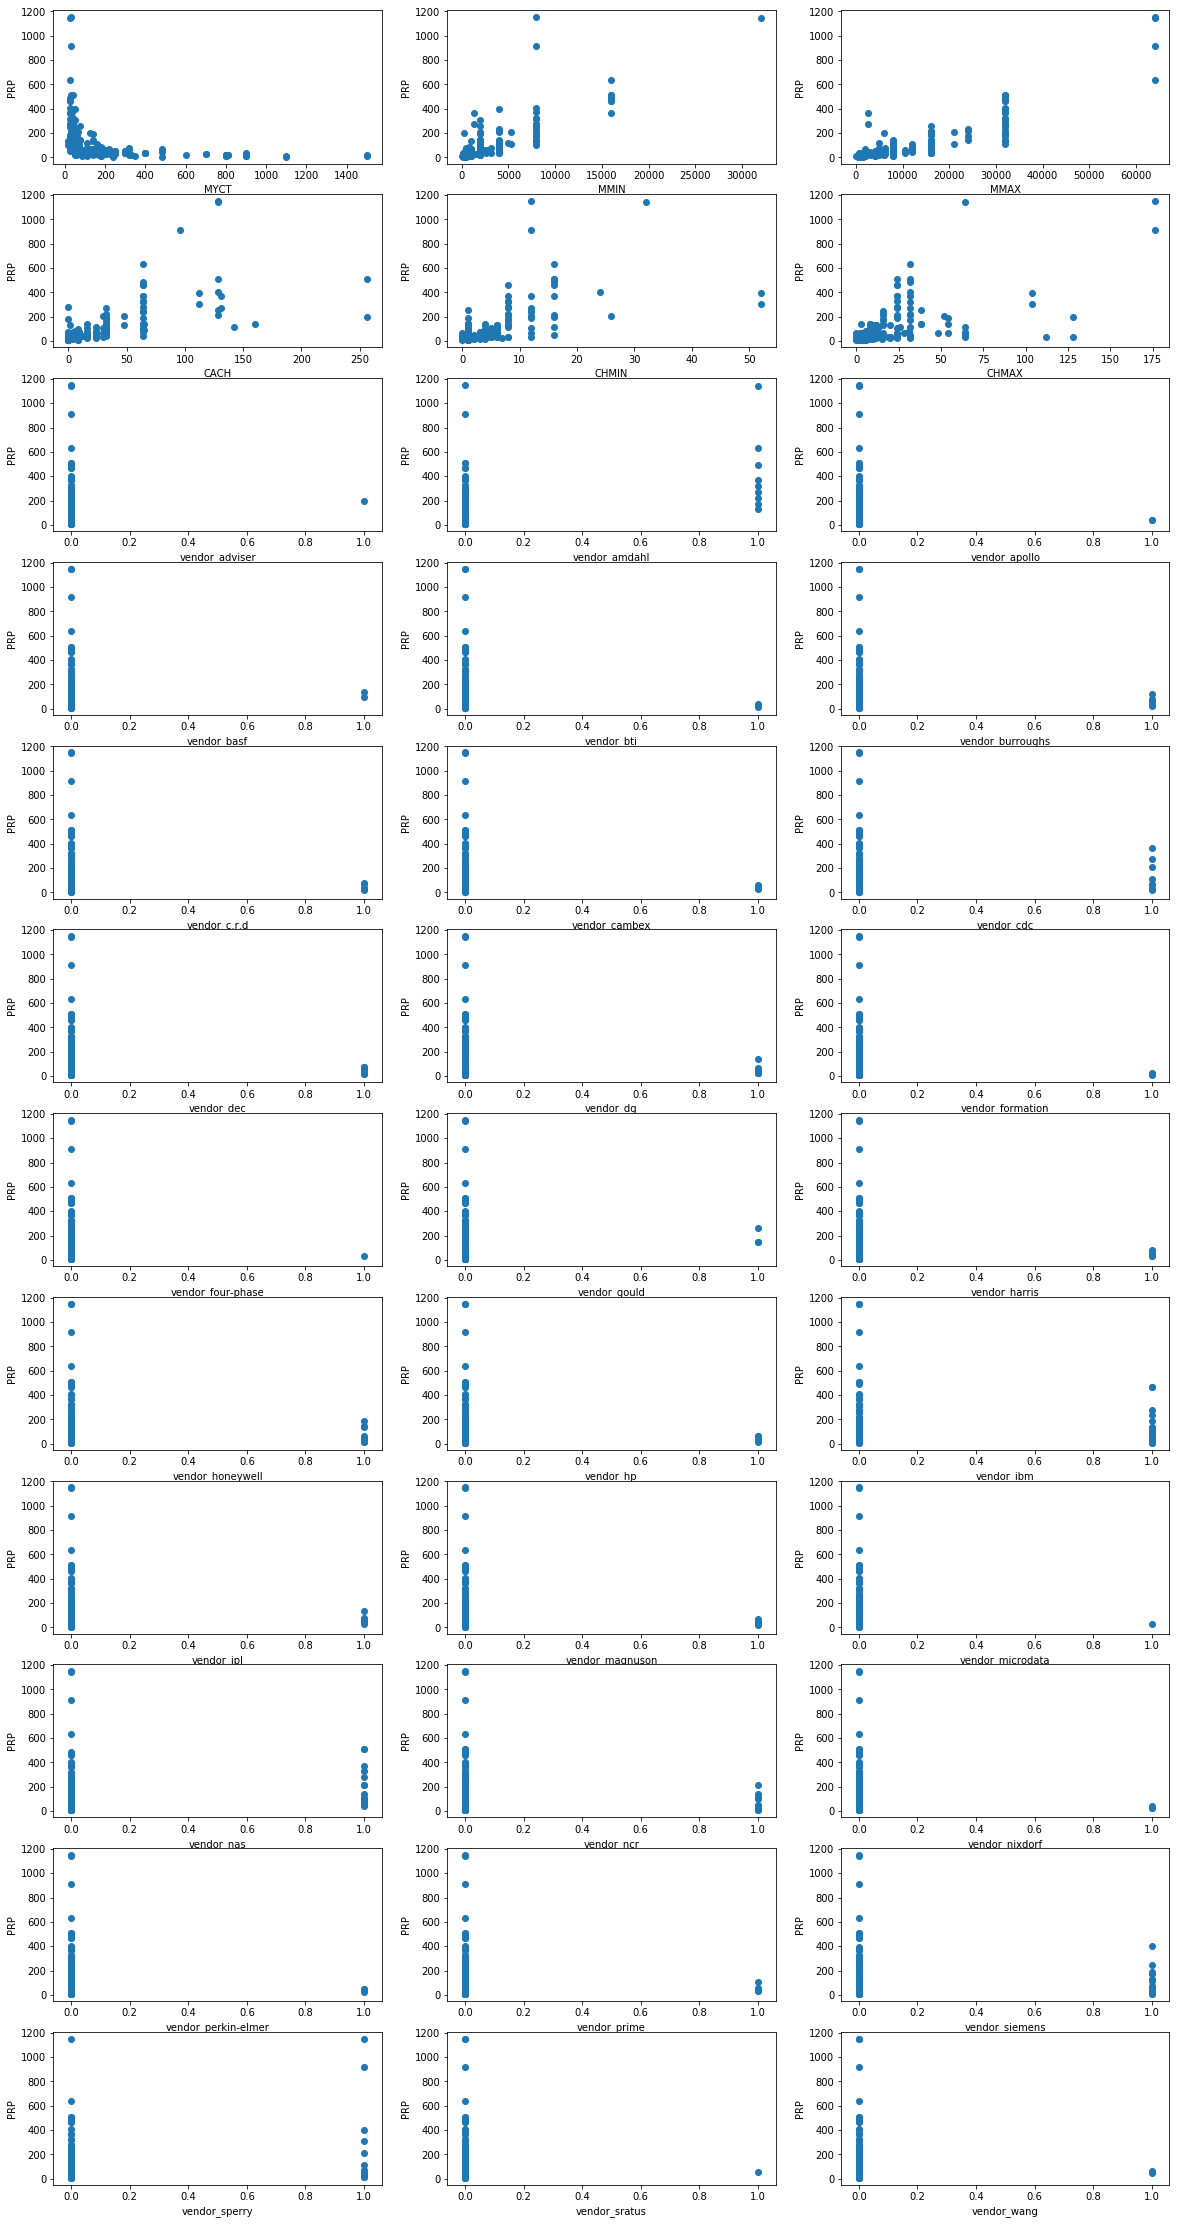

In [10]:
plt.figure(1, figsize=[20, 40])
plot_width = 3
plot_height = (features.shape[1] - 1) // plot_width + 1
for f_num, f_name in enumerate(features.columns):
    plt.subplot(plot_height, plot_width, f_num + 1)
    plt.scatter(features[f_name], labels)
    plt.xlabel(f_name)
    plt.ylabel('PRP')

<h4>The relation between "MYCT" and "PRP" seems to be inversal. Try to build relation betwee "PRP" and inversed "MYCT"(adding a small constant for numeric stability) </h4>

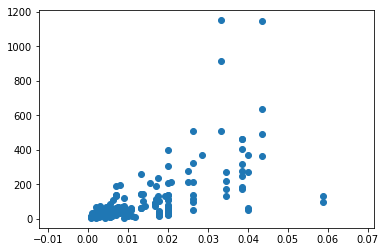

In [11]:
plt.scatter( 1 / (features['MYCT'] + 0.001), df['PRP'])

<h4> The relation is almost linear. It's worth replacing "MYCT" by inversed value. </h4>

In [12]:
features = pd.concat([features.drop(['MYCT'], axis=1),
           pd.DataFrame.from_dict({"MYCT_inv": 1 / (features['MYCT'] + 1)})],
           axis=1)

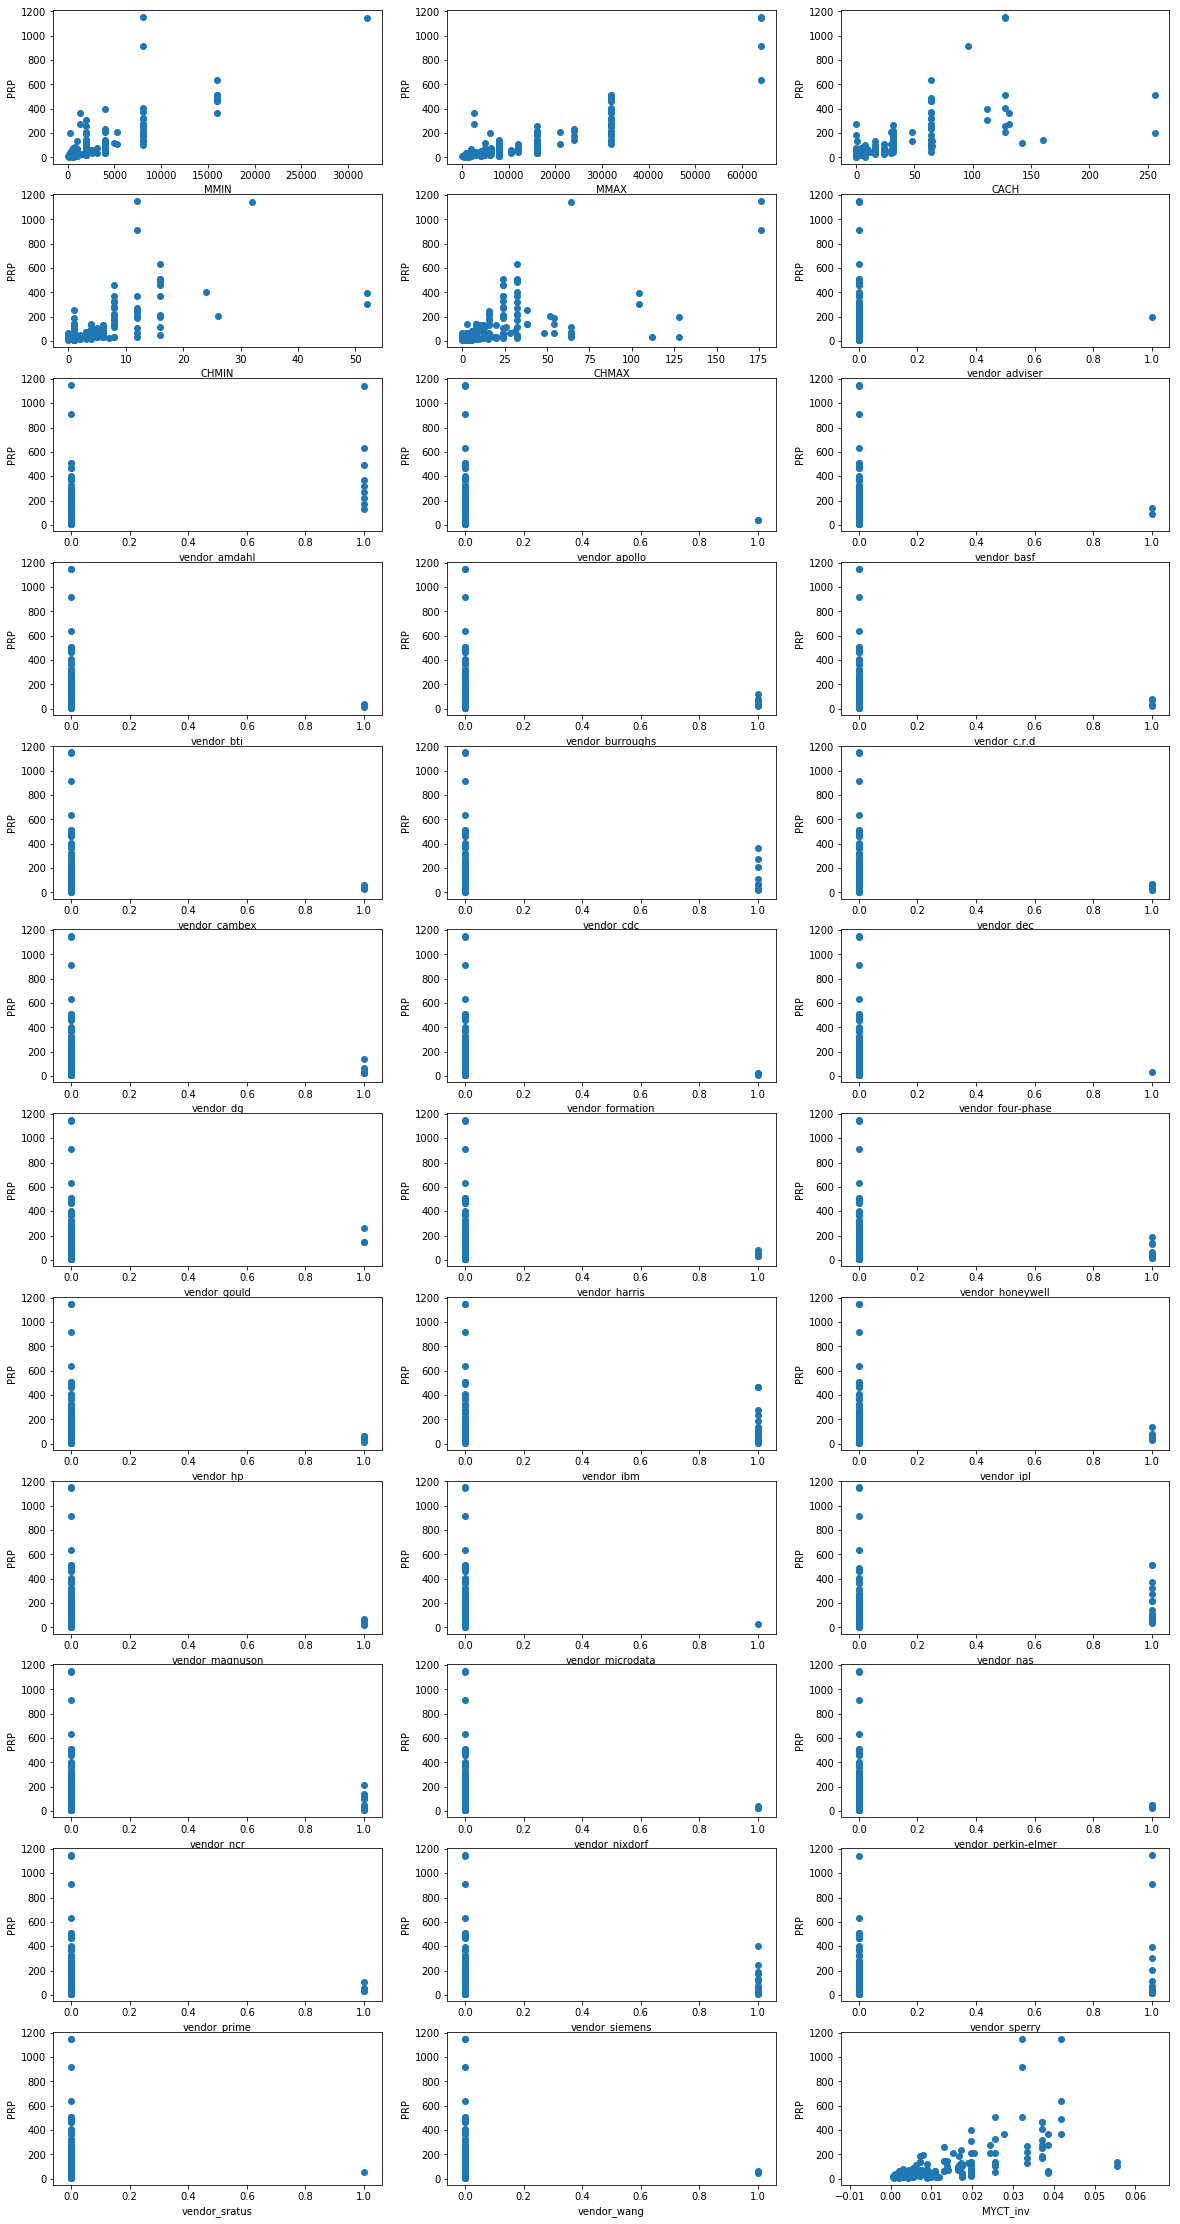

In [13]:
plt.figure(1, figsize=[20, 40])
plot_width = 3
plot_height = (features.shape[1] - 1) // plot_width + 1
for f_num, f_name in enumerate(features.columns):
    plt.subplot(plot_height, plot_width, f_num + 1)
    plt.scatter(features[f_name], labels)
    plt.xlabel(f_name)
    plt.ylabel('PRP')

<h4> Train linear regression on the data </h4>

In [14]:
train_f, valid_f, test_f = features[:140], features[140:170], features[170:]
train_l, valid_l, test_l = labels[:140], labels[140:170], labels[170:]

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_f, train_l)
print(
    mean_absolute_error(model.predict(valid_f), valid_l),
    mean_squared_error(model.predict(valid_f), valid_l) ** 0.5
)

40.0755615202 134.47257622


<h3>There are many similar relations on the plots. Let's look at the correlations</h3>

In [17]:
features.corr()

,MMIN,MMAX,CACH,CHMIN,CHMAX,vendor_adviser,vendor_amdahl,vendor_apollo,vendor_basf,vendor_bti,...,vendor_nas,vendor_ncr,vendor_nixdorf,vendor_perkin-elmer,vendor_prime,vendor_siemens,vendor_sperry,vendor_sratus,vendor_wang,MYCT_inv
MMIN,1.000000,0.758157,0.534729,0.517189,0.266907,-0.046805,0.573734,-0.053650,0.003354,-0.065539,...,0.204346,0.049745,-0.047861,-0.068404,-0.075383,0.088278,-0.029366,-0.015554,-0.053650,0.695489
MMAX,0.758157,1.000000,0.537990,0.560513,0.527246,-0.034354,0.463073,-0.071808,0.001713,-0.031628,...,0.164854,-0.041235,-0.073545,-0.039160,-0.088274,0.041221,0.241570,-0.022500,-0.048701,0.658800
CACH,0.534729,0.537990,1.000000,0.582245,0.487846,0.394822,0.165822,-0.056277,0.096507,-0.061128,...,0.232867,0.043171,-0.011530,-0.074055,-0.051008,0.057610,0.125285,-0.043120,-0.022325,0.488902
CHMIN,0.517189,0.560513,0.582245,1.000000,0.548281,0.115238,0.269371,-0.053464,-0.053464,-0.031781,...,0.045837,0.008503,-0.065638,-0.047891,-0.075943,0.092605,0.323146,-0.027517,-0.067919,0.492689
CHMAX,0.266907,0.527246,0.487846,0.548281,1.000000,0.293369,0.126860,-0.054076,-0.038916,-0.001016,...,-0.058457,-0.053075,-0.067941,-0.050880,-0.045080,-0.042201,0.348714,-0.011410,-0.069236,0.243673
vendor_adviser,-0.046805,-0.034354,0.394822,0.115238,0.293369,1.000000,-0.014709,-0.006816,-0.006816,-0.006816,...,-0.021926,-0.017857,-0.008367,-0.008367,-0.010855,-0.017113,-0.017857,-0.004808,-0.006816,-0.031909
vendor_amdahl,0.573734,0.463073,0.165822,0.269371,0.126860,-0.014709,1.000000,-0.020851,-0.020851,-0.020851,...,-0.067082,-0.054632,-0.025600,-0.025600,-0.033211,-0.052356,-0.054632,-0.014709,-0.020851,0.440633
vendor_apollo,-0.053650,-0.071808,-0.056277,-0.053464,-0.054076,-0.006816,-0.020851,1.000000,-0.009662,-0.009662,...,-0.031083,-0.025315,-0.011862,-0.011862,-0.015389,-0.024260,-0.025315,-0.006816,-0.009662,-0.091231
vendor_basf,0.003354,0.001713,0.096507,-0.053464,-0.038916,-0.006816,-0.020851,-0.009662,1.000000,-0.009662,...,-0.031083,-0.025315,-0.011862,-0.011862,-0.015389,-0.024260,-0.025315,-0.006816,-0.009662,0.039818
vendor_bti,-0.065539,-0.031628,-0.061128,-0.031781,-0.001016,-0.006816,-0.020851,-0.009662,-0.009662,1.000000,...,-0.031083,-0.025315,-0.011862,-0.011862,-0.015389,-0.024260,-0.025315,-0.006816,-0.009662,-0.079245


<h3> Some features are strongly correlated. It might worth reducing dimensionality to get rid of multiocollinearity </h3>

<h4>
    <p> Try use L1 regularization first </p>
    <p> Tune regularization strength </p>
</h4>

In [18]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
cv = GridSearchCV(
    estimator=Lasso(),
    param_grid={'alpha' : np.logspace(-2, 2, 1000)},
    scoring=make_scorer(mean_absolute_error)
)
cv.fit(train_f, train_l)
print(cv.best_params_)
print(
    mean_absolute_error(cv.predict(valid_f), valid_l),
    mean_squared_error(cv.predict(valid_f), valid_l) ** 0.5
)

{'alpha': 82.39785684528519}
39.7733273175 123.681061975


<h4>
    <p>Error increases alongside with the alpha.</p>
    <p>Reduce dimensiality using PCA</p>
</h4>

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

In [20]:
transform = PCA(10)

In [21]:
transform.fit(normalize(features, axis=0))

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

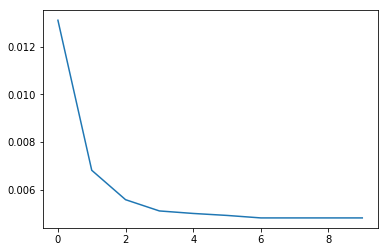

In [22]:
plt.plot(range(10), transform.explained_variance_)

In [23]:
new_features = PCA(10).fit_transform(normalize(features, axis=0))

In [24]:
model = LinearRegression()
model.fit(new_features[:140], labels[:140])
print(
    mean_absolute_error(model.predict(new_features[140:170]), labels[140:170]),
    mean_squared_error(model.predict(new_features[140:170]), labels[140:170]) ** 0.5
)

50.9870771866 137.850165466


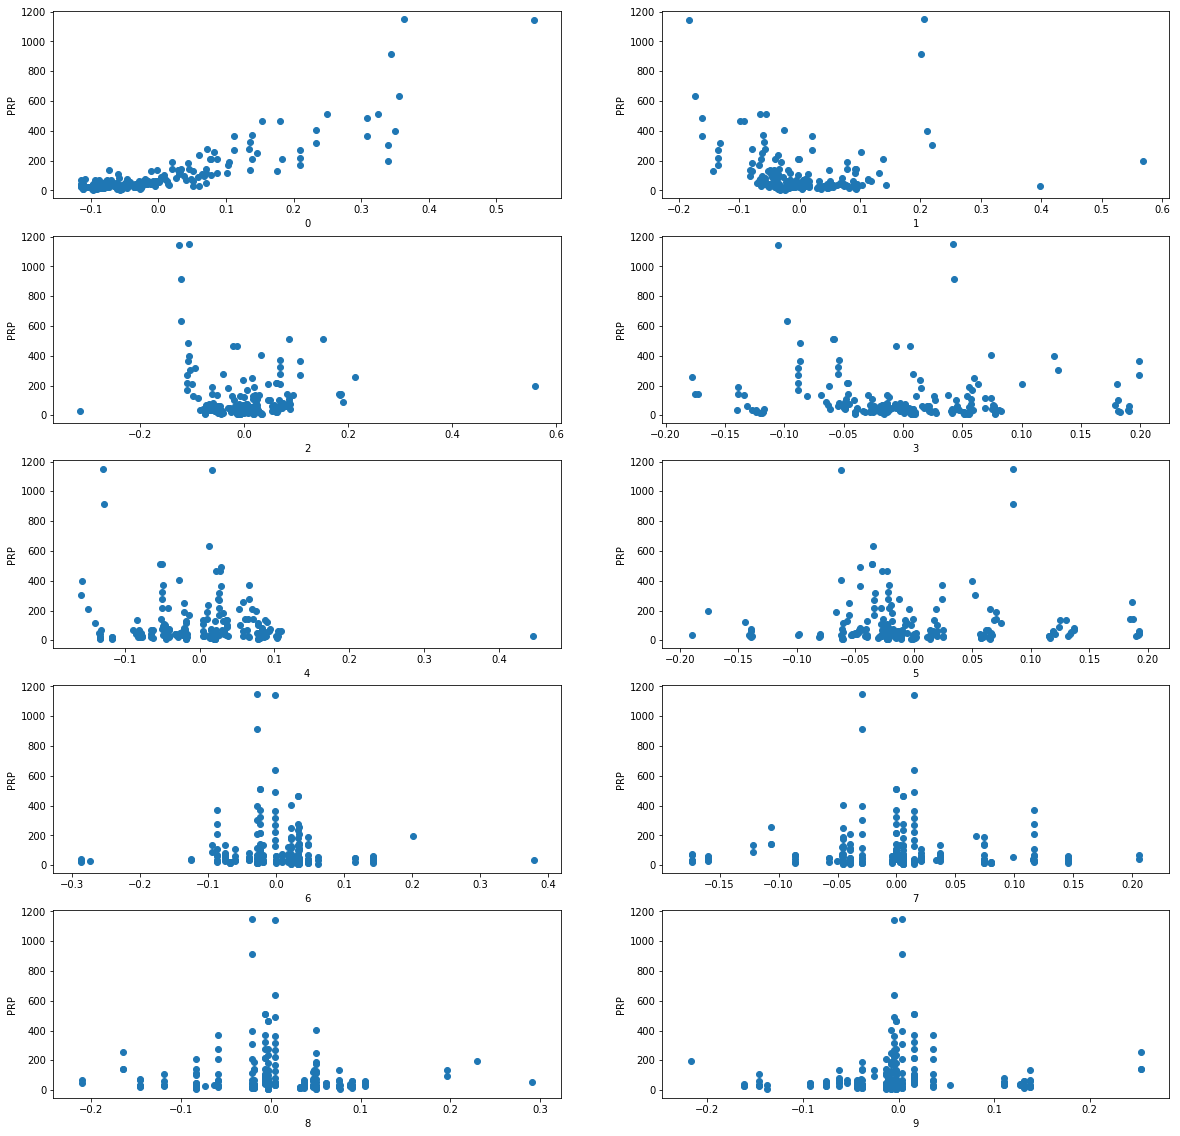

In [25]:
plt.figure(1, figsize=[20, 20])
plot_width = 2
plot_height = (new_features.shape[1] - 1) // plot_width + 1
for f_num in range(new_features.shape[1]):
    plt.subplot(plot_height, plot_width, f_num + 1)
    plt.scatter(new_features[:,f_num], labels)
    plt.xlabel(str(f_num))
    plt.ylabel('PRP')

<h4> Relation for "1" seems to be exponential </h4>

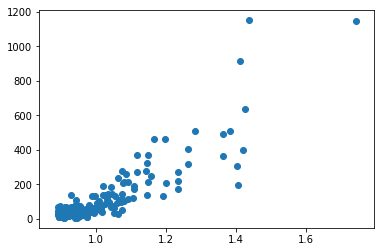

In [26]:
plt.scatter(np.exp(new_features[:,0]), labels)

In [27]:
for i in range(new_features.shape[0]):
    new_features[i, 0] = np.exp(new_features[i, 0])

In [28]:
model = LinearRegression()
model.fit(new_features[:140], labels[:140])
print(
    mean_absolute_error(model.predict(new_features[140:170]), labels[140:170]),
    mean_squared_error(model.predict(new_features[140:170]), labels[140:170]) ** 0.5
)

48.2623527937 130.122112295


<h4> The transformation improved results a little, though not enough</h4>

<h3> Try to use neural network to make predictions </h3>
<h4> The dataset is extremely small, so that's just an example </h4>

In [29]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [30]:
features.columns

Index(['MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'vendor_adviser',
       'vendor_amdahl', 'vendor_apollo', 'vendor_basf', 'vendor_bti',
       'vendor_burroughs', 'vendor_c.r.d', 'vendor_cambex', 'vendor_cdc',
       'vendor_dec', 'vendor_dg', 'vendor_formation', 'vendor_four-phase',
       'vendor_gould', 'vendor_harris', 'vendor_honeywell', 'vendor_hp',
       'vendor_ibm', 'vendor_ipl', 'vendor_magnuson', 'vendor_microdata',
       'vendor_nas', 'vendor_ncr', 'vendor_nixdorf', 'vendor_perkin-elmer',
       'vendor_prime', 'vendor_siemens', 'vendor_sperry', 'vendor_sratus',
       'vendor_wang', 'MYCT_inv'],
      dtype='object')

In [31]:
main_features = features[['MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'MYCT_inv']]
n_features = main_features.shape[1]

In [32]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(n_features, 8)
        self.fc2 = nn.Linear(8, 5)
        self.fc3 = nn.Linear(5, 1)
        
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

In [33]:
net = Net()
criterion = nn.MSELoss()

train_inp = np.array(main_features[:140].as_matrix(), dtype=np.float32)
train_res = np.array(train_l.as_matrix(), dtype=np.float32)

learning_rate = 0.01
decay_rate = 0.9
optimizer = optim.SGD(net.parameters(), lr=0.0001)

for epoch in range(20000):
    inp, res = Variable(torch.from_numpy(train_inp)), Variable(torch.from_numpy(train_res))
    
    optimizer.zero_grad()
    
    out = net(inp)
    loss = criterion(out, res)
    loss.backward()
    
    optimizer.step()
    if epoch % 1000 == 0:
        print("epoch %d. loss : %d" % (epoch, loss.data[0]))
    

epoch 0. loss : 25895
epoch 1000. loss : 18410
epoch 2000. loss : 17703
epoch 3000. loss : 17641
epoch 4000. loss : 17634
epoch 5000. loss : 17633
epoch 6000. loss : 17633
epoch 7000. loss : 17633
epoch 8000. loss : 17633
epoch 9000. loss : 17633
epoch 10000. loss : 17633
epoch 11000. loss : 17633
epoch 12000. loss : 17633
epoch 13000. loss : 17633
epoch 14000. loss : 17632
epoch 15000. loss : 17632
epoch 16000. loss : 17632
epoch 17000. loss : 17632
epoch 18000. loss : 17632
epoch 19000. loss : 17632


In [34]:
valid_inp = np.array(main_features[140:170], dtype=np.float32)
prediction = net(Variable(torch.from_numpy(valid_inp))).data.numpy()
mean_absolute_error(prediction, valid_l)

93.708443196614581

<h4> Not good :( </h4>

<h2> Comparition with the original article </h2>

In [36]:
model = LinearRegression()
model.fit(train_f, train_l)

print(
    "Our linear model:",
    mean_absolute_error(model.predict(test_f), test_l),
    mean_squared_error(model.predict(test_f), test_l) ** 0.5
)

print("Linear model from the original article:",
    mean_absolute_error(test_l, baseline_labels[170:]),
    mean_squared_error(test_l, baseline_labels[170:]) ** 0.5
)

Our linear model: 42.2832376236 91.8018925515
Linear model from the original article: 31.6923076923 50.6227880175
